# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [2]:
import numpy as np

# 빠진 값이 있는지 확인
np.isnan(df_X).any(), np.isnan(df_y).any()

(np.False_, np.False_)

In [3]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [6]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [7]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [8]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

Iteration 200 : Loss 3442.3692
Iteration 400 : Loss 3093.8400
Iteration 600 : Loss 2978.8860
Iteration 800 : Loss 2933.6520
Iteration 1000 : Loss 2914.6414
Iteration 1200 : Loss 2906.1330
Iteration 1400 : Loss 2902.0509
Iteration 1600 : Loss 2899.9334
Iteration 1800 : Loss 2898.7340
Iteration 2000 : Loss 2897.9853
Iteration 2200 : Loss 2897.4680
Iteration 2400 : Loss 2897.0744
Iteration 2600 : Loss 2896.7493
Iteration 2800 : Loss 2896.4633
Iteration 3000 : Loss 2896.2005


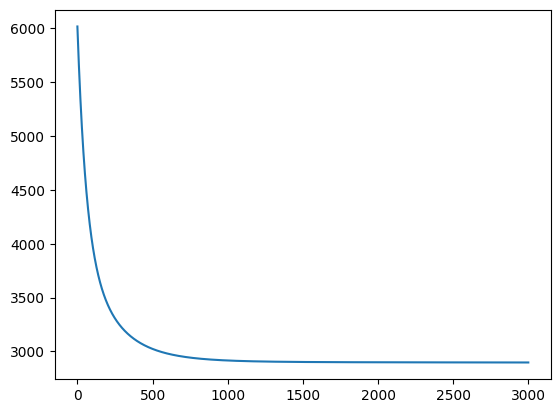

MSE: 2883.998243605163
4.27 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n 1 -r 1
global W, b

W = np.random.rand(X_train.shape[1])
b = np.random.rand()

losses = []
# learning rate 0.5로 변경
LEARNING_RATE = 0.5

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 200 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

# 테스트셋 평가
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print("MSE:", mse)

Iteration 200: Loss 3489.7629
Iteration 400: Loss 3168.2859
Iteration 600: Loss 3069.5349
Iteration 800: Loss 3033.9119
Iteration 1000: Loss 3020.6423
Iteration 1200: Loss 3015.6063
Iteration 1400: Loss 3013.6660
Iteration 1600: Loss 3012.9088
Iteration 1800: Loss 3012.6101
Iteration 2000: Loss 3012.4911
Iteration 2200: Loss 3012.4433
Iteration 2400: Loss 3012.4239
Iteration 2600: Loss 3012.4160
Iteration 2800: Loss 3012.4127
Iteration 3000: Loss 3012.4113


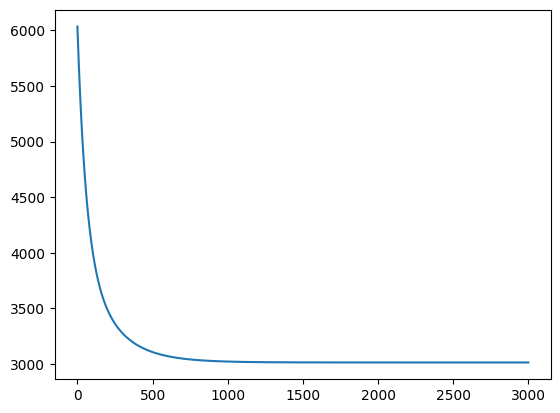

PCA 적용 후 MSE: 2864.3846426376067


In [ ]:
from sklearn.decomposition import PCA

# PCA로 5개 주성분으로 축소
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

global W_pca, b_pca
W_pca = np.random.rand(X_train_pca.shape[1])
b_pca = np.random.rand()

losses = []
# learning rate 0.5로 변경
LEARNING_RATE = 0.5

for i in range(1, 3001):
    dW, db = gradient(X_train_pca, W_pca, b_pca, y_train)
    W_pca -= LEARNING_RATE * dW
    b_pca -= LEARNING_RATE * db
    L = loss(X_train_pca, W_pca, b_pca, y_train)
    losses.append(L)
    if i % 200 == 0:
        print(f'Iteration {i}: Loss {L:.4f}')

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

# 테스트셋 평가
prediction = model(X_test_pca, W_pca, b_pca)
mse = loss(X_test_pca, W_pca, b_pca, y_test)
print("PCA 적용 후 MSE:", mse)

- PCA 적용 후 소폭 개선 된 것으로 보이나 큰 차이는 없어보임
- Iterate 값도 늘렸다 줄였다 해봤으나 2800 위아래로 더 큰 차이는 안보임

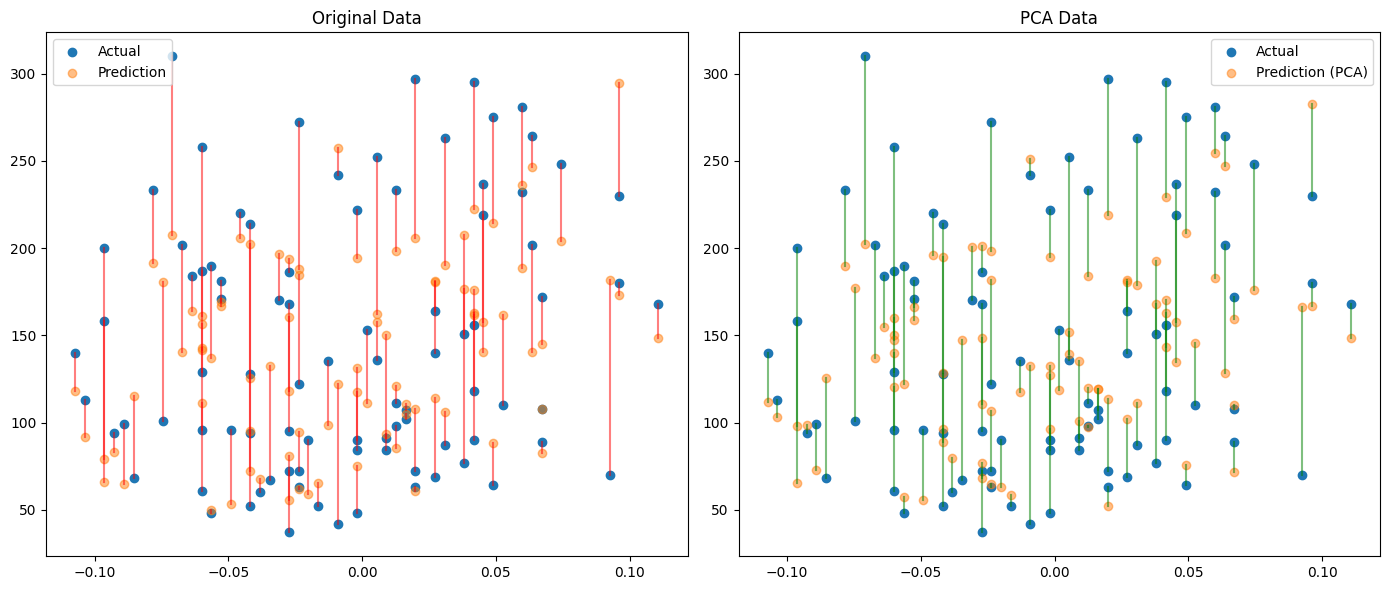

In [11]:
import matplotlib.pyplot as plt

# 원래 데이터 예측 결과
prediction_orig = model(X_test, W, b)

# PCA 데이터 예측 결과 (PCA 적용 후 W, b 사용)
prediction_pca = model(X_test_pca, W_pca, b_pca)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 원래 데이터 시각화
axs[0].scatter(X_test[:, 0], y_test, label='Actual')
axs[0].scatter(X_test[:, 0], prediction_orig, label='Prediction', alpha=0.5)
for i in range(len(y_test)):
    axs[0].plot([X_test[i, 0], X_test[i, 0]], [y_test[i], prediction_orig[i]], color='red', alpha=0.5)
axs[0].set_title('Original Data')
axs[0].legend()

# PCA 데이터 시각화
axs[1].scatter(X_test[:, 0], y_test, label='Actual')
axs[1].scatter(X_test[:, 0], prediction_pca, label='Prediction (PCA)', alpha=0.5)
for i in range(len(y_test)):
    axs[1].plot([X_test[i, 0], X_test[i, 0]], [y_test[i], prediction_pca[i]], color='green', alpha=0.5)
axs[1].set_title('PCA Data')
axs[1].legend()

plt.tight_layout()
plt.show()

- 기존 예시 그래프에서는 Actual과 Prediction 차이가 눈에 잘 안보여서 둘 사이에 라인 추가